In [1]:
# 步骤
# 1.读取NPZ文件
# 2.onehot 独热编码
# 3.分为train和test数据
# 4.搭建CNN模型
# 5.训练模型
# 6.保存模型

In [2]:
## 1.读取NPZ文件

In [3]:
import numpy as np

In [4]:
arr = np.load('./data/imageData.npz')

In [5]:
img_list = arr['arr_0']
label_list =arr['arr_1']

In [6]:
img_list.shape,label_list.shape

((5320, 100, 100, 3), (5320,))

## 2.onehot 独热编码

In [7]:
np.unique(label_list)

array(['1.yes', '2.no', '3.nose'], dtype='<U6')

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [9]:
# 实例化
onehot = OneHotEncoder()

In [10]:
# 编码
y_onehot =onehot.fit_transform(label_list.reshape(-1,1))

In [11]:
y_onehot_arr = y_onehot.toarray()

In [12]:
y_onehot_arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## 3.分为train和test数据

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(img_list,y_onehot_arr,test_size=0.2,random_state=42)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4256, 100, 100, 3), (1064, 100, 100, 3), (4256, 3), (1064, 3))

## 4.搭建CNN模型

In [16]:
# pip install --upgrade tensorflow
# pip install tensorflow-gpu==版本号  # GPU

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [18]:
# 搭建模型

![](./cnn.png)

In [19]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(166,activation='relu'),
    layers.Dense(22,activation='relu'),
    layers.Dense(3,activation='sigmoid')
])

In [20]:
# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [21]:
# 预览模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

## 5.训练模型

In [22]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=15)

Epoch 1/15
142/142 [==============================] - 4s 28ms/step - loss: 0.2084 - accuracy: 0.9328 - val_loss: 0.1120 - val_accuracy: 0.9633
Epoch 2/15
142/142 [==============================] - 4s 29ms/step - loss: 0.1136 - accuracy: 0.9645 - val_loss: 0.1333 - val_accuracy: 0.9605
Epoch 3/15
142/142 [==============================] - 4s 30ms/step - loss: 0.0831 - accuracy: 0.9734 - val_loss: 0.0672 - val_accuracy: 0.9756
Epoch 4/15
142/142 [==============================] - 4s 29ms/step - loss: 0.0608 - accuracy: 0.9791 - val_loss: 0.0577 - val_accuracy: 0.9859
Epoch 5/15
142/142 [==============================] - 4s 31ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.1064 - val_accuracy: 0.9737
Epoch 6/15
142/142 [==============================] - 4s 31ms/step - loss: 0.0485 - accuracy: 0.9821 - val_loss: 0.1245 - val_accuracy: 0.9699
Epoch 7/15
142/142 [==============================] - 4s 31ms/step - loss: 0.0300 - accuracy: 0.9922 - val_loss: 0.0745 - val_accuracy: 0.9803

In [23]:
# 查看训练效果


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
history_pd = pd.DataFrame(history.history)

In [26]:
history_pd

,loss,accuracy,val_loss,val_accuracy
0,0.208449,0.932801,0.111963,0.963346
1,0.113573,0.964521,0.133309,0.960526
2,0.083130,0.973449,0.067184,0.975564
3,0.060772,0.979088,0.057737,0.985902
4,0.047358,0.984962,0.106374,0.973684
5,0.048464,0.982143,0.124503,0.969925
6,0.030027,0.992246,0.074485,0.980263
7,0.028132,0.989192,0.091613,0.980263
8,0.018942,0.994361,0.087360,0.982143
9,0.008612,0.996946,0.089328,0.984962


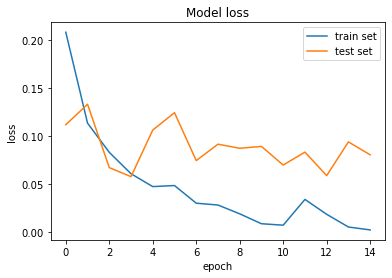

In [27]:
# 查看损失
plt.plot(history_pd['loss'])
plt.plot(history_pd['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

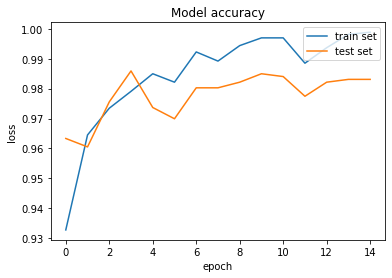

In [28]:
# 查看准确率
plt.plot(history_pd['accuracy'])
plt.plot(history_pd['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train set','test set'],loc='upper right')
plt.show()

## 6.保存模型

In [29]:
model.save('./data/face_mask_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./data/face_mask_model\assets
